In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np

In [23]:
file_salary = "../Resource/indeed_job_dataset.csv"

In [24]:
salary_df = pd.read_csv(file_salary)
salary_df.head()


,Unnamed: 0,Job_Title,Link,Queried_Salary,Job_Type,Skill,No_of_Skills,Company,No_of_Reviews,No_of_Stars,Date_Since_Posted,Description,Location,Company_Revenue,Company_Employees,Company_Industry
0,0,Data Scientist,https://www.indeed.com/rc/clk?jk=6a105f495c36a...,<80000,data_scientist,"['SAP', 'SQL']",2,Express Scripts,3301.0,3.3,1.0,"[<p><b>POSITION SUMMARY</b></p>, <p>\r\r\nThe ...",MO,More than $10B (USD),"10,000+",Health Care
1,1,Data Scientist,https://www.indeed.com/rc/clk?jk=86afd561ea8c6...,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",5,Money Mart Financial Services,NaN,NaN,15.0,"[<p><b>What do we need?</b></p>, <ul><li>\r\r\...",TX,NaN,NaN,NaN
2,2,Data Scientist,https://www.indeed.com/rc/clk?jk=e0aad317e6d45...,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",9,comScore,62.0,3.5,1.0,"[<ul><li>Validate, analyze, and conduct statis...",OR,NaN,NaN,NaN
3,3,Graduate Studies Program - Data Scientist,https://www.indeed.com/rc/clk?jk=1cfdd9e391a63...,<80000,data_scientist,['Certified Internal Auditor'],1,Central Intelligence Agency,158.0,4.3,30.0,"[<p>Full time</p>, <p>Washington, DC metro are...",DC,NaN,NaN,Government
4,4,Data Scientist I,https://www.indeed.com/rc/clk?jk=fec647775a21e...,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",7,Federal Reserve Bank of Dallas,495.0,4.1,30.0,[<ul><li>Assist in consultations with business...,TX,NaN,"Less than 10,000",Banks and Financial Services


In [25]:
salary_df.columns

Index(['Unnamed: 0', 'Job_Title', 'Link', 'Queried_Salary', 'Job_Type',
       'Skill', 'No_of_Skills', 'Company', 'No_of_Reviews', 'No_of_Stars',
       'Date_Since_Posted', 'Description', 'Location', 'Company_Revenue',
       'Company_Employees', 'Company_Industry'],
      dtype='object')

In [26]:
salary_df = salary_df[['Job_Title','Queried_Salary','Job_Type','Skill','Company',
                                  'Location','Company_Industry']]
salary_df

,Job_Title,Queried_Salary,Job_Type,Skill,Company,Location,Company_Industry
0,Data Scientist,<80000,data_scientist,"['SAP', 'SQL']",Express Scripts,MO,Health Care
1,Data Scientist,<80000,data_scientist,"['Machine Learning', 'R', 'SAS', 'SQL', 'Python']",Money Mart Financial Services,TX,NaN
2,Data Scientist,<80000,data_scientist,"['Data Mining', 'Data Management', 'R', 'SAS',...",comScore,OR,NaN
3,Graduate Studies Program - Data Scientist,<80000,data_scientist,['Certified Internal Auditor'],Central Intelligence Agency,DC,Government
4,Data Scientist I,<80000,data_scientist,"['Statistical Software', 'Time Management', 'R...",Federal Reserve Bank of Dallas,TX,Banks and Financial Services
...,...,...,...,...,...,...,...
5710,Senior Data Engineer,>160000,data_engineer,"['Hive', 'Hadoop', 'Oracle', 'SQL', 'HBase', '...",Intelliswift Software Inc,NaN,NaN
5711,"Principal Data Engineer (Java, Spark, Storm, AWS)",>160000,data_engineer,"['Network', 'Scala', 'Kafka', 'Java', 'MongoDB...",Jobspring Partners,CA,Human Resources and Staffing
5712,Executive Director- Architect: Data Engineerin...,>160000,data_engineer,"['Spring', 'Data Management', 'Hadoop', 'Kafka...",JPMorgan Chase,DE,Banks and Financial Services
5713,"Senior Manager, Data Engineering (hands on)",>160000,data_engineer,"['Spring', 'Ruby', 'Test Automation', 'Scripti...",Capital One,NY,Banks and Financial Services


In [27]:
salary_df.info()  #not needed for combined

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5715 entries, 0 to 5714
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Job_Title         5715 non-null   object
 1   Queried_Salary    5715 non-null   object
 2   Job_Type          5715 non-null   object
 3   Skill             5483 non-null   object
 4   Company           5611 non-null   object
 5   Location          5463 non-null   object
 6   Company_Industry  3826 non-null   object
dtypes: object(7)
memory usage: 312.7+ KB


In [28]:
salary_df.count() 

Job_Title           5715
Queried_Salary      5715
Job_Type            5715
Skill               5483
Company             5611
Location            5463
Company_Industry    3826
dtype: int64

In [29]:
salary_df['Skill'].isnull().sum()

232

In [30]:
salary_df['Location'].isnull().sum()

252

In [31]:

salary_df['Company'].isnull().sum()

104

In [32]:
salary_df['Skill'].replace('', np.nan, inplace=True)
salary_df['Company'].replace('', np.nan, inplace=True)
salary_df['Location'].replace('', np.nan, inplace=True)

In [33]:
salary_df.dropna(subset=['Skill','Location','Company'], inplace=True)

In [34]:
salary_df['Company_Industry'].isnull().sum()

1499

In [35]:
salary_df['Company_Industry'].fillna('Missln', inplace=True)

In [36]:
salary_df.count()

Job_Title           5166
Queried_Salary      5166
Job_Type            5166
Skill               5166
Company             5166
Location            5166
Company_Industry    5166
dtype: int64

In [37]:
salary_df["Job_Title"].value_counts()

#,"Location","Location","Company_Industry"

Data Scientist                        696
Data Analyst                          378
Data Engineer                         289
Senior Data Scientist                 203
Senior Data Engineer                  109
                                     ... 
Data Analyst - Automotive Retail        1
Data Engineer - Analytics Platform      1
Economist/Data Scientist                1
Academic Affairs Data Analyst           1
Scientist 1 - Machine Learning          1
Name: Job_Title, Length: 2149, dtype: int64

In [38]:
salary_df["Company_Industry"].value_counts()

Missln                                                             1499
Consulting and Business Services                                    708
Internet and Software                                               620
Banks and Financial Services                                        455
Health Care                                                         304
Insurance                                                           214
Industrial Manufacturing                                            144
Aerospace and Defense                                               127
Retail                                                              119
Education and Schools                                               108
Computers and Electronics                                            99
Consumer Goods and Services                                          97
Media, News and Publishing                                           95
Human Resources and Staffing                                    

In [39]:
salary_df = salary_df.replace(
    {"Industrial ManufacturingAgriculture and Extraction": "Industrial Manufacturing",
     "Industrial ManufacturingConstruction": "Industrial Manufacturing",
     "Industrial ManufacturingConsumer Goods and Services": "Industrial Manufacturing", 
     "Real EstateReal Estate": "Real Estate",
     "Restaurants, Travel and LeisureConsulting and Business Services": "Restaurants, Travel and Leisure",
     "Food and BeveragesConsulting and Business Services": "Food and Beverages",
     "RetailConsumer Goods and Services": "Consumer Goods and Services","InsuranceHealth Care": "Insurance",
    
    })
salary_df["Company_Industry"].value_counts()
sal_df = salary_df[~salary_df.Company_Industry.str.contains("Missln")]


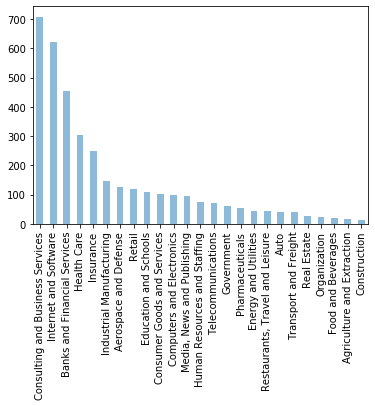

In [40]:

sal_df["Company_Industry"].value_counts().plot(kind="bar",alpha=0.5, align="center")

In [41]:
skills = ['Python','SQL','Machine Learning',"R",'Hadoop',"Tableau",'SPSS','Data Mining','JavaScript','Java']
num_jobs= []
def get_skills(skill):
    
    skill_counter=0

    for index,row in salary_df.iterrows():
    
        if skill in row["Skill"]:
            skill_counter += 1       
    
           # print(skill)
    
    return skill_counter

counter=0

total_skills = len(skills)


for skill in skills:
    
    counter_curr=counter+get_skills(skill)
    counter=0
    
 #   print(counter_curr)
    num_jobs.append(counter_curr)
    
print(num_jobs)


[3089, 3222, 2228, 2508, 1538, 1193, 278, 1046, 276, 1458]


In [42]:
skill_set = ['Python','SQL','Machine Learning',"R",'Hadoop',"Tableau",'SPSS','Data Mining','JavaScript','Java']

plt.figure(figsize=(25,25))
plt.pie(num_jobs, labels=pies, autopct="%1.1f%%", shadow=False, startangle=140,textprops={'fontsize': 20})
# Create axes which are equal so we have a perfect circle

plt.axis("equal")

NameError: name 'pies' is not defined

<Figure size 1800x1800 with 0 Axes>

In [ ]:
counter_python=0
counter_others=0
counter_sql =0
machine_learning_c=0
counter_r= 0
counter_hadoop=0
counter_tableau=0

for index,row in salary_df.iterrows():
    
    if "Python" in row["Skill"]:
        
        counter_python += 1
        
    elif "SQL" in row["Skill"]:
        
        counter_sql += 1 
    
    elif "Machine Learning" in row["Skill"]:
    
        machine_learning_c +=1
        
    elif 'R' in row['Skill']:
        
        counter_r += 1
        
    elif 'Hadoop' in row['Skill']:
        
        counter_hadoop += 1       
        
    elif 'Tableau' in row['Skill']:
        
        counter_tableau += 1
                 
    else:
        counter_others += 1
            
       
print(counter_python)
print(counter_sql)
print(machine_learning_c)
print(counter_r)
print(counter_hadoop)
print(counter_tableau)
print(counter_others)

In [ ]:
salary_df["Python"] = ''
salary_df["SQL"] = ''
salary_df["Machine_Learning"] = ''
salary_df["R"] = ''
salary_df["Hadoop"] = ''
salary_df["Tableau"] = ''
salary_df["Others"] = ''


for index,row in salary_df.iterrows():
    
    if "Python" in row["Skill"]:
        row["Python"] = "True"
    elif 'SQL' in row["Skill"]:
        row['SQL'] = "True"
    elif 'Machine Learning' in row["Skill"]:
        row["Machine_Learning"] = "True"
    elif 'R' in row["Skill"]:
        row["R"] = "True"
    elif 'Hadoop' in row["Skill"]:
        row["Hadoop"] = "True"
    elif 'Tableau' in row["Skill"]:
        row["Tableau"] = "True"

    elif 'Others' in row["Skill"]:
        row['Others'] = "True"
        
salary_df.head()

In [43]:
#DS job By Industry

salary_df.groupby('Company_Industry')["Job_Type"].count()

Company_Industry
Aerospace and Defense                127
Agriculture and Extraction            18
Auto                                  42
Banks and Financial Services         455
Computers and Electronics             99
Construction                          14
Consulting and Business Services     708
Consumer Goods and Services          103
Education and Schools                108
Energy and Utilities                  45
Food and Beverages                    19
Government                            61
Health Care                          304
Human Resources and Staffing          73
Industrial Manufacturing             148
Insurance                            250
Internet and Software                620
Media, News and Publishing            95
Missln                              1499
Organization                          22
Pharmaceuticals                       53
Real Estate                           26
Restaurants, Travel and Leisure       45
Retail                               119

In [ ]:
salary_df.groupby('Location')["Job_Type"].count()

In [ ]:
# DS salary by job type

salary_df.groupby("Job_Type")['Queried_Salary'].value_counts()


In [ ]:
# DS salary by skill

salary_df.groupby("Job_Type")['Python'].value_counts()


In [ ]:
salary_df.groupby("Job_Type")['Machine_Learning'].value_counts()


In [ ]:
salary_df.groupby("Job_Type")['R'].value_counts()

In [ ]:
salary_df.groupby("Job_Type")['Hadoop'].value_counts()

In [ ]:
salary_df.groupby("Job_Type")['SQL'].value_counts()

In [ ]:
salary_df.groupby("Job_Type")["Tableau"].value_counts()

In [ ]:
# trying to get skill by job type through single df ### not working

jobtype_skil_df=salary_df.groupby("Job_Type")[['Python','SQL','Machine_Learning',"R",'Hadoop',"Tableau"]]
print(jobtype_skil_df)

jobtype_skil_df.fillna('False', inplace=True)



In [ ]:
# JObs by ["Company_Industry"], Location

group_salary_location=salary_df.groupby(['Location',"Company_Industry"])
group_salary_location["Job_Type"].count()


In [ ]:
# salary by lication and industry
group_location_industry=salary_df.groupby(["Location","Company_Industry"])["Queried_Salary"].value_counts()
group_location_industry

In [ ]:
salary_df.groupby("Location")['Queried_Salary'].value_counts()